<a href="https://colab.research.google.com/github/EvgeniyStrizhak/My-master-s-thesis/blob/main/The_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Development of a Machine Learning Model for Predicting the Frankfurt Stock Exchange (GDAXI) Index Using Macro-Economic Indicators

This project predicts future month price of the Frankfurt Stock Exchange (GDAXI) index by using some machine learning models

**Importance:**

- Stock market indexes reflect the overall economic health and investor sentiment.
- Accurate predictions empower investors, fund managers, and policymakers to make informed decisions.
- Macroeconomic indicators (e.g., GDP, interest rates, inflation) influence stock market trends, making them key to understanding market behavior.

**Applications:**
- Portfolio Optimization: Assists investors in asset allocation by anticipating market fluctuations.
- Risk Management: Provides early warnings of downturns, enabling proactive risk mitigation strategies.
- Economic Policy: Helps policymakers gauge the impact of macro-economic decisions on financial markets.

**Predictive models face challenges such as:**
- Deep non-linear relationships between indicators and market movements.
- Black swan theory
- Market predictions violate the Efficient-market hypothesis (EMH)

**Currently, this project has not yet been finished. The performance of the models can be improved by:**

- Better feature selection. Data pipeline allows for easily choosing different indexes from the Bundesbank database and combining them into one data frame.
- Better parameter selection. Using GridSearchCV, existing models can demonstrate better performance by iterating through different parameters.
- Testing more different ML models.
- Implementing deep learning models.

**Methodology**:
- Trained models: in the process
- Validation model: crossvalidation
- Model estimator: root mean squared error

In [22]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [21]:
RANDOMSTATE = 1234
#link to GitHub repo where stock price is saved
TARGET_URL = 'https://raw.githubusercontent.com/EvgeniyStrizhak/My-master-s-thesis/refs/heads/main/row_datasets/target.csv'
TARGET_FILE_NAME = 'target.csv'
##link to GitHub repo where macroeconomics indicators are saved
FEATURE_URL = 'https://raw.githubusercontent.com/EvgeniyStrizhak/My-master-s-thesis/refs/heads/main/row_datasets/features.csv'
FEATURE_FILE_NAME = 'features.csv'

In [3]:
#geting data from url and saves it locally
def get_data(url, file_name):
  response = requests.get(url)

#Check if the request was successful
  if response.status_code == 200:
      # Save the file locally
      with open(file_name, "wb") as file:
          file.write(response.content)
      print(f"File downloaded successfully: {file_name}")
      return file_name
  else:
    print(f"Failed to download file: {file_name} Status code: {response.status_code}")
    return None

In [5]:
#function makes a line graph
def plot_data(data, column, ax):
    sns.lineplot(y=column, x='year', data=data, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Year')
    ax.set_title(f'German {column} index')

In [32]:
#function training model using GridSearchCV
def model_training (model, grid_space, features_train, target_train):

#pipline to scale data before every cross validation iteration
    pipline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

#Apply pipline for parameter iteration function
    grid = GridSearchCV(pipline, param_grid=grid_space, cv=5, scoring='neg_root_mean_squared_error')
    model_grid = grid.fit(features_train, target_train)

    print('The model with the best parameters: '+str(model_grid.best_params_))
#multiply negative root mean squared error by -1 to avoid confusion
    print('The best result (RMSE): '+str(model_grid.best_score_*-1))
    return model_grid

##Data Collection

In [6]:
#Download preprocessed data from GitHub
get_data(TARGET_URL, TARGET_FILE_NAME)
get_data(FEATURE_URL, FEATURE_FILE_NAME)

File downloaded successfully: target.csv
File downloaded successfully: features.csv


'features.csv'

In [7]:
#Create a data frame
target = pd.read_csv('target.csv')
features = pd.read_csv('features.csv')
df = pd.merge(target, features, on=['year', 'month'], how='inner')

In [9]:
df.describe()

,year,month,Price,quarter,production_sector,orders-received,unemployment_rate,labour_costs,consumer_prices,economy's_price competitiveness,balance_of_payments,gdp,interest_rate
count,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000,236.000000
mean,2014.419492,6.466102,9941.155085,2.487288,97.597034,87.267373,6.955932,87.931356,101.080085,93.530932,15306.548686,96.307627,1.283898
std,5.693397,3.431226,3779.480596,1.112715,5.969642,8.497404,1.759959,12.700053,11.344065,1.558811,13995.178246,6.835736,1.520657
min,2005.000000,1.000000,3843.740000,1.000000,78.100000,56.200000,4.900000,70.300000,84.600000,90.100000,-32083.212000,83.400000,0.000000
25%,2009.750000,3.750000,6581.432500,1.750000,94.875000,83.775000,5.700000,76.950000,92.000000,92.500000,6311.494250,90.735000,0.000000
50%,2014.000000,6.000000,9745.095000,2.000000,98.900000,88.550000,6.550000,86.000000,99.500000,93.800000,15647.401500,95.830000,0.750000
75%,2019.000000,9.000000,12612.847500,3.000000,100.925000,92.325000,7.700000,98.100000,105.525000,94.350000,23574.005000,103.690000,2.062500
max,2024.000000,12.000000,19324.930000,4.000000,108.500000,107.800000,12.100000,115.400000,129.400000,97.300000,56748.327000,105.350000,4.500000


The data does not contain outliers, missing values, or other data quality issues.

##Data analysis

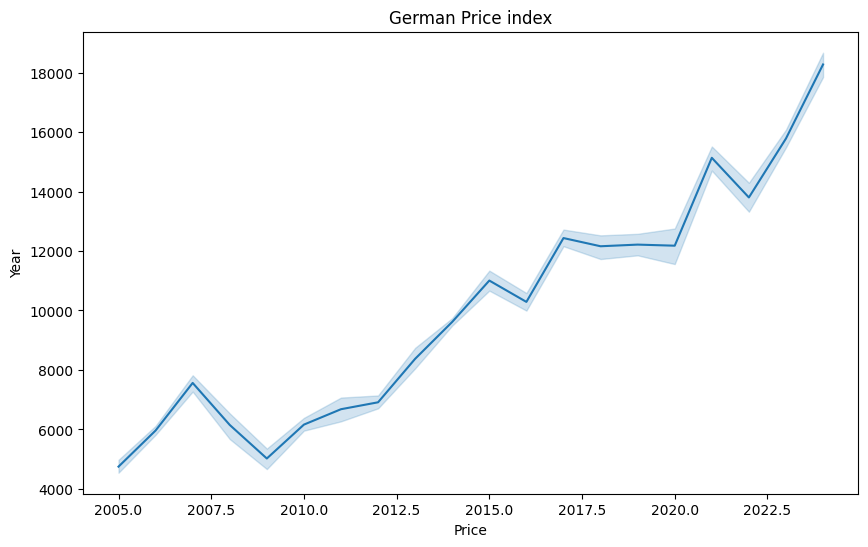

In [10]:
plt.figure(figsize=(10, 6))

plot_data(df, 'Price', plt.gca())

The line graph shows the dynamics of the target value. The DAXI index has been steadily growing during this period, with some notable drops: the 2008 financial crisis and the COVID crisis.

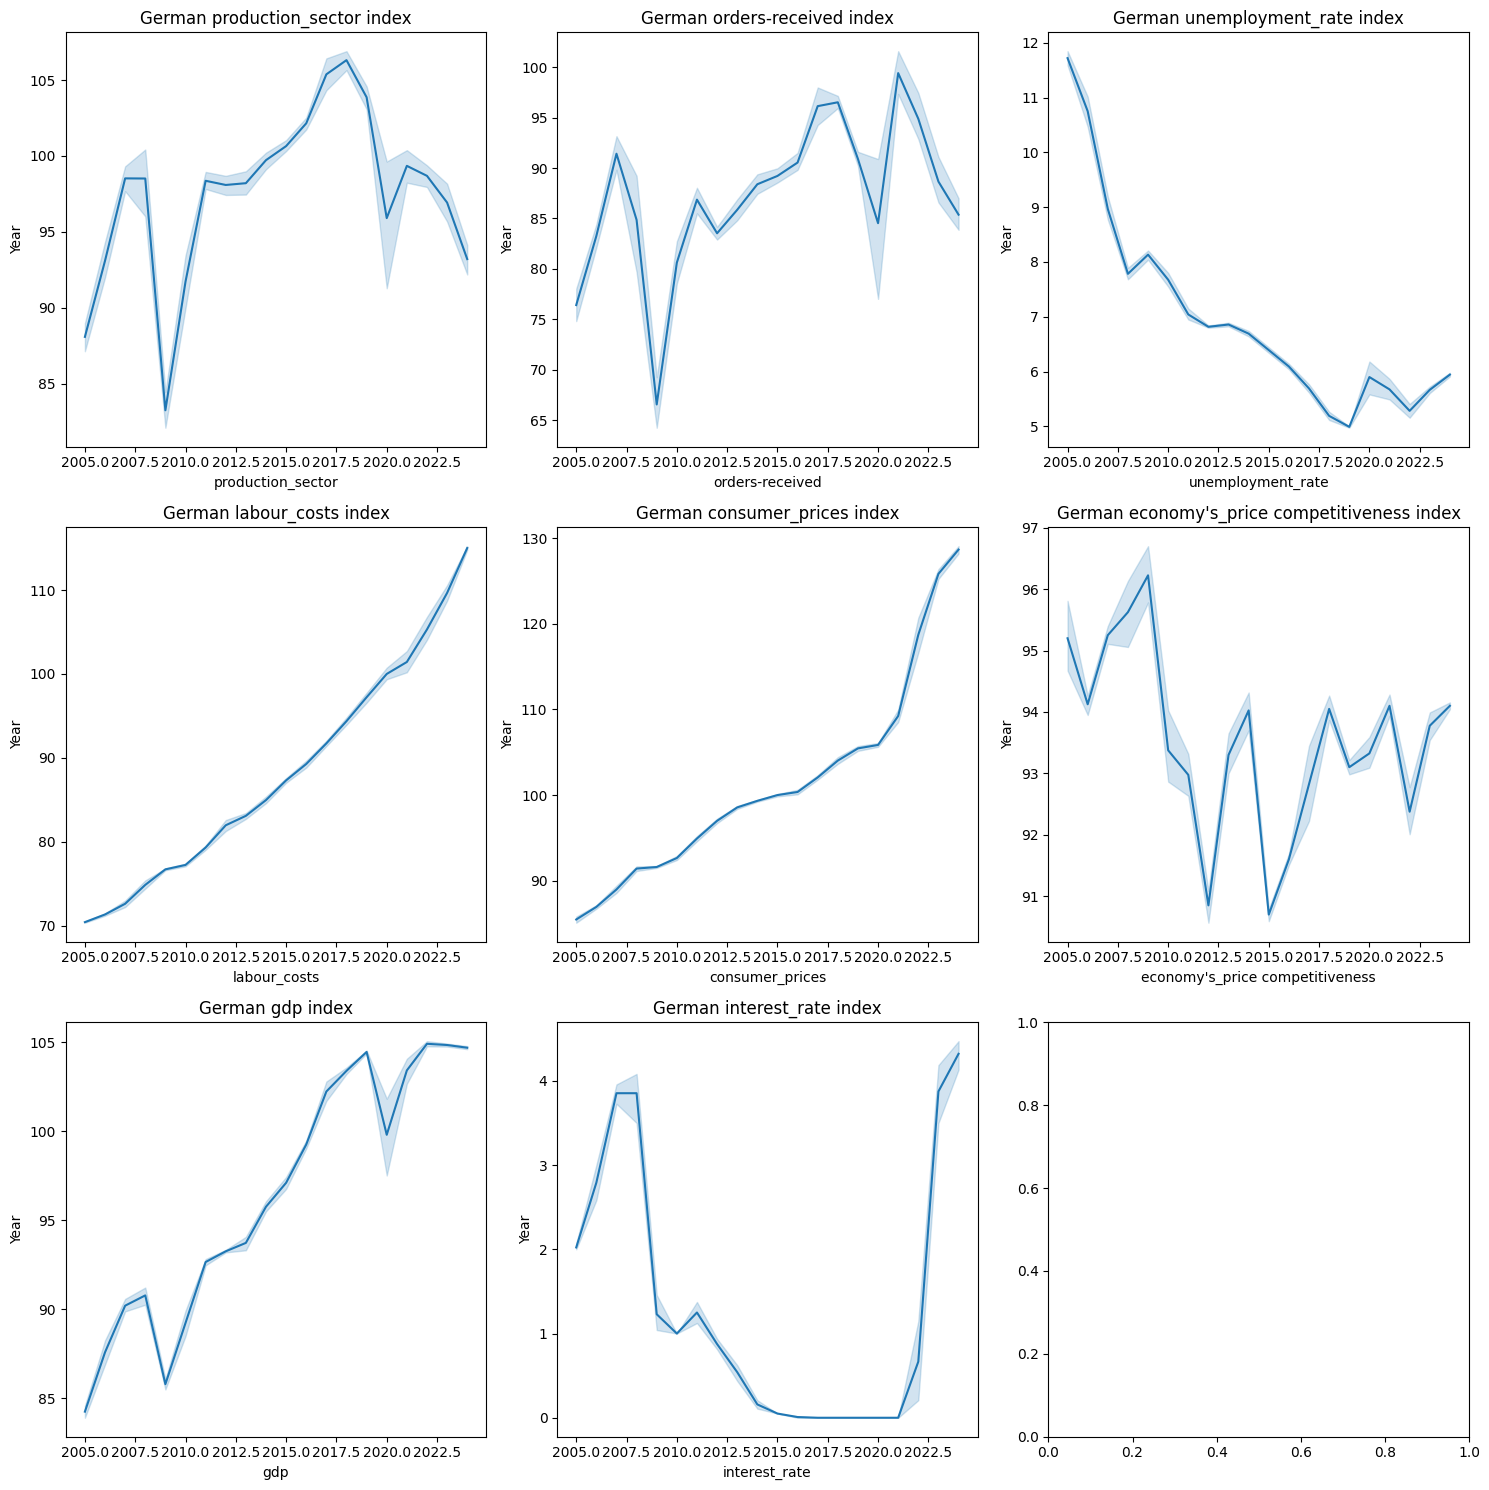

In [11]:
#make a grid of features line graphs
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
#select features
columns = ['production_sector', 'orders-received', 'unemployment_rate', 'labour_costs', 'consumer_prices', "economy's_price competitiveness", 'gdp', 'interest_rate']

for i, column in enumerate(columns):
#calculate row index
  row = i // 3
#calculate column index
  col = i % 3
  plot_data(df, column, axes[row, col])

#adjust spacing between subplots
plt.tight_layout()
plt.show()

- The German manufacturing sector has a completely different dynamic and may not be an important factor for stock market forecasting. German industry is rapidly losing its role in the German economy. During this period, it grew by 5%, while Germany's GDP grew by 20%

- At the same time, the unemployment rate shows a negative correlation with economic growth and stock market growth.

- GDP, labor costs, and the consumer price index show similar dynamics, and there may be a close linear relationship between these indicators and the stock market index.

- The interest rate index shows economic trends. During crises, the interest rate rises, and during economic growth, the interest rate falls.

In [12]:
#selecing features by deleting target and data from dataset
features = df.drop(['Price', 'month', 'year', 'quarter'], axis=1)
target = df['Price']

In [13]:
#list of features
print(features.columns)

Index(['production_sector', 'orders-received', 'unemployment_rate',
       'labour_costs', 'consumer_prices', 'economy's_price competitiveness',
       'balance_of_payments', 'gdp', 'interest_rate'],
      dtype='object')


In [14]:
#splitting data to train and test samples
features_train, features_test = train_test_split(features, test_size=0.25, random_state=RANDOMSTATE)
target_train, target_test = train_test_split(target, test_size=0.25, random_state=RANDOMSTATE)

##Model Training

In [36]:
model_line = LinearRegression()

scores_line  = cross_val_score(model_line, features_train, target_train, scoring='neg_root_mean_squared_error', cv=5)
final_score_line = scores_line.mean()

# grid search results
print('The best result (RMSE): ', final_score_line*-1)

The best result (RMSE):  904.2904086937997


In [35]:
grid_space_forest={
            'model__max_depth':[3,5,10,None],
            'model__n_estimators':[10,100],
            'model__min_samples_leaf':[2, 3, 4, 5],
            'model__min_samples_split':[2, 3, 4, 5]
           }
#use previously created function
model_training (RandomForestRegressor(random_state=RANDOMSTATE), grid_space_forest, features_train, target_train)

The model with the best parameters: {'model__max_depth': None, 'model__min_samples_leaf': 2, 'model__min_samples_split': 2, 'model__n_estimators': 100}
The best result (RMSE): 601.150069504122


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        RandomForestRegressor(random_state=1234))]),
             param_grid={'model__max_depth': [3, 5, 10, None],
                         'model__min_samples_leaf': [2, 3, 4, 5],
                         'model__min_samples_split': [2, 3, 4, 5],
                         'model__n_estimators': [10, 100]},
             scoring='neg_root_mean_squared_error')

In [34]:
grid_space_svr={'model__C':[0.01, 2, 3]
           }
#use previously created function
model_training (SVR(), grid_space_svr, features_train, target_train)

The model with the best parameters: {'model__C': 3}
The best result (RMSE): 3743.1318706717925


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', SVR())]),
             param_grid={'model__C': [0.01, 2, 3]},
             scoring='neg_root_mean_squared_error')

##Model Testing

In [43]:
model_test = RandomForestRegressor(max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100)
model_test.fit(features_train, target_train)
model_pred = model_test.predict(features_test)
#use RMSE estimation as previously
rmse_test = mean_squared_error(target_test, model_pred)**0.5
print('The average root square error in the test sample was:', rmse_test, '$')

The average root square error in the test sample was: 577.2070676874769 $


**Conclusion:**

The random forest regression model has shown the best result so far. The average error of 577\$ is 5.8% of the average price of 9941\$ per share in this period. This result is possibly unsatisfactory and requires improvement.